# AIT 526: Lab2

- Hamaad Zuberi
- Feb 19th, 2024


## Task 1: Text Summarization with Word Frequencies

### Task 1.1

Use the web scraping technique with BeautifulSoup as shown in class to get the text data from the specified data location on the Wikipedia webpage.


In [780]:
import bs4 as bs
import urllib.request
import re

def _scrape_webpage(url):
    """
    Use BeautifulSoup to scrape a webpage and return the text.
    """
    scraped_text = urllib.request.urlopen(url)
    text = scraped_text.read()
    parsed_text = bs.BeautifulSoup(text, 'html.parser')
    paragraphs = parsed_text.find_all('p')
    formatted_text = ""
    
    for para in paragraphs:
        formatted_text += para.text
        
    return formatted_text

In [781]:
raw_text = _scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')

# Remove references (e.g., [1], [2], etc.) from the text
raw_text = re.sub(r'\[[0-9]*\]', ' ', raw_text)

# Remove extra spaces from the text
raw_text = re.sub(r'\s+', ' ', raw_text)

print(raw_text)

Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics. Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning. Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation. Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed

### Task 1.2

Preprocess the text data and must include word tokenization, stopwords and punctuation removal, etc.


In [782]:
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Tokenize the raw text into sentences
sentences = nltk.sent_tokenize(raw_text)
print(sentences[:5])

text = clean_text(raw_text)

def tokenize(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords from the tokens
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

# Tokenize the cleaned text into words
words = tokenize(text)
print(words[:10])

['Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence.', 'It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics.', 'Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning.', 'Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.', 'Natural language processing has its roots in the 1950s.']
['natural', 'language', 'processing', 'nlp', 'subfield', 'computer', 'science', 'especially', 'artificial', 'intelligence']


### Task 1.3

Calculate word frequencies or weighted word frequencies.


In [783]:

# Calculate the frequency distribution of words
freq_dist = nltk.FreqDist(words)

def find_weighted_frequency(freq_dist):
    max_frequency = max(freq_dist.values())
    frequencies = {}
    for key in freq_dist.keys():
        frequencies[key] = freq_dist[key] / max_frequency
    
    return frequencies

weighted_freq = find_weighted_frequency(freq_dist)
freq_dist.most_common(10)

[('language', 17),
 ('natural', 14),
 ('nlp', 14),
 ('cognitive', 13),
 ('processing', 10),
 ('linguistics', 10),
 ('based', 10),
 ('tasks', 9),
 ('approach', 9),
 ('statistical', 7)]

### Task 1.4

Score the sentences


In [784]:
def calculate_sentence_scores(sentences, freq_dist):
    scores = {}
    for sentence in sentences:
        clean_sentence = clean_text(sentence)
        sentence_words = nltk.word_tokenize(clean_sentence)
        for word in sentence_words:
            # Check if the word is in the frequency distribution
            if word in freq_dist.keys():
                # If the sentence is not already in the scores dictionary, add it with the word's frequency as the initial score
                if sentence not in scores.keys():
                    scores[sentence] = freq_dist[word]
                # If the sentence is already in the scores dictionary, increment its score by the word's frequency
                else:
                    scores[sentence] += freq_dist[word]
                     
    return scores

scores = calculate_sentence_scores(sentences, weighted_freq)
print(scores)

{'Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence.': 4.352941176470588, 'It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics.': 4.588235294117646, 'Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning.': 4.235294117647059, 'Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.': 7.470588235294117, 'Natural language processing has its roots in the 1950s.': 2.4705882352941173, 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intellige

### Task 1.5

Rank the sentences.


In [785]:
def adjust_score(scores):
    """
    Adjust the scores of sentences by dividing the original score by the word count of each sentence.
    """
    sentences_scores = {}
    # Iterate through each sentence and its corresponding score
    for sentence, score in scores.items():
        # Tokenize the sentence to count the number of words
        word_count = len(nltk.word_tokenize(sentence))
        # Calculate the adjusted score by dividing the original score by the word count
        adjusted_score = score / word_count
        sentences_scores[sentence] = adjusted_score
        
    return sentences_scores

# Adjust the scores of the sentences based on the word count on sentence.
# This is to make sure longer sentences with more words do not get an unfair advantage.
sentence_scores = adjust_score(scores)

# Sort the sentences based on their adjusted scores in descending order
ranked_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

print(ranked_sentences[:5])

[('Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.', 0.37352941176470583), ('Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence.', 0.2560553633217993), ('Natural language processing has its roots in the 1950s.', 0.24705882352941172), ('Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules.', 0.20433436532507734), ('Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.', 0.19389978213507622)]


### Task 1.6

Build a summary based on sentence count, word count, and percentage. Print out all three summarized text examples.


In [786]:
def summarize_by_sentence_count(ranked_sentences, n):
    """
    Summarize the text by selecting the top 'n' sentences based on their scores.
    """
    summary_sentences = [sentence for sentence, score in ranked_sentences[:n]]
    summary = ' '.join(summary_sentences)
    return summary

def summarize_by_word_count(ranked_sentences, max_words):
    """
    Summarize the text by selecting sentences until the total word count reaches 'max_words'.
    """
    summary_words = []
    total_words = 0
    for sentence, score in ranked_sentences:
        word_count = len(nltk.word_tokenize(sentence))
        if total_words + word_count <= max_words:
            summary_words.append(sentence)
            total_words += word_count
        if total_words >= max_words:
            break
    summary = ' '.join(summary_words)
    return summary

def summarize_by_percentage(sentences, ranked_sentences, percentage):
    """
    Summarize the text by selecting sentences until the total word count reaches a given percentage of the original text.
    """
    total_word_count = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences)
    max_words = int(total_word_count * percentage)
    
    return summarize_by_word_count(ranked_sentences, max_words)

summary_sentence_count = summarize_by_sentence_count(ranked_sentences, 5)
summary_word_count = summarize_by_word_count(ranked_sentences, 50)
summary_percentage = summarize_by_percentage(sentences, ranked_sentences, 0.2)

In [787]:
print("Summary based on Sentence Count:")
print(summary_sentence_count)

print("\nSummary based on Word Count:")
print(summary_word_count)

print("\nSummary based on Percentage:")
print(summary_percentage)

Summary based on Sentence Count:
Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation. Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. Natural language processing has its roots in the 1950s. Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.

Summary based on Word Count:
Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation. Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. Natural language processing has its roots in the 1950s.

Summary based on Perce

## Task 2: Text Summarization with N-grams

### Task 2.1

Follow the following code examples to generate N-grams with NLTK:


In [788]:
from nltk.util import ngrams

def generate_ngrams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text.lower()), n)
    return [' '.join(grams) for grams in n_grams]

### Task 2.2

Write the code for text summarization with any N-grams.
Note that we will check your program using at least two different n-grams, e.g., n=2, 3, or 4.

- a) Use NLTK to get N-grams and FreqDist() to calculate the n-gram frequencies


<FreqDist with 1008 samples and 1046 outcomes>
[('natural language processing', 8), ('in natural language', 4), ('( e.g. ,', 3), ('language processing .', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('a subfield of', 2), ('artificial intelligence .', 2), ('tasks in natural', 2)]


<Axes: xlabel='Samples', ylabel='Counts'>

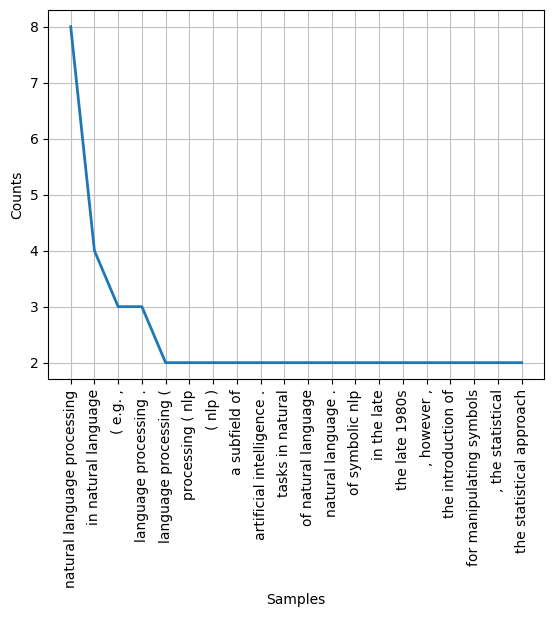

In [789]:
# Set the value of n for n-grams
n = 3

# Generate n-grams from the text
ngrams_list = generate_ngrams(raw_text, n)
freq_dist_ngram = nltk.FreqDist(ngrams_list)
print(freq_dist_ngram)

top_ngrams = freq_dist_ngram.most_common(10)
print(top_ngrams)

freq_dist_ngram.plot(20)

- b) Find weighted frequency occurrences from FreqDist. You can use the similar function from Task 1.


In [790]:
ngram_freqs = find_weighted_frequency(freq_dist_ngram)
list(ngram_freqs.items())[:20]

[('natural language processing', 1.0),
 ('language processing (', 0.25),
 ('processing ( nlp', 0.25),
 ('( nlp )', 0.25),
 ('nlp ) is', 0.125),
 (') is a', 0.125),
 ('is a subfield', 0.125),
 ('a subfield of', 0.25),
 ('subfield of computer', 0.125),
 ('of computer science', 0.125),
 ('computer science and', 0.125),
 ('science and especially', 0.125),
 ('and especially artificial', 0.125),
 ('especially artificial intelligence', 0.125),
 ('artificial intelligence .', 0.25),
 ('intelligence . it', 0.125),
 ('. it is', 0.125),
 ('it is primarily', 0.125),
 ('is primarily concerned', 0.125),
 ('primarily concerned with', 0.125)]

- c) Define the function like calculate_sentence_scores_ngram(sent_tokens,
  ngram_freqs, n_grams) to calculate the sentence scores for any N-grams. This function
  is similar to the one in Task 1.


In [791]:
def calculate_sentence_scores_ngram(sentences, ngram_freqs, n):
    sentence_scores = {}
    
    for sentence in sentences:
        # Clean the sentence by removing non-alphabetic characters and converting to lowercase
        sentence_clean = clean_text(sentence)
        # Generate n-grams from the cleaned sentence
        sentence_ngrams = generate_ngrams(sentence_clean, n)
        # Initialize the score for the current sentence to 0
        score = 0
        # Iterate through each n-gram in the sentence
        for ngram in sentence_ngrams:
            # If the n-gram is in the frequency distribution, add its weighted frequency to the score
            if ngram in ngram_freqs:
                score += ngram_freqs[ngram]
        # If the score is greater than 0, add the sentence and its score to the dictionary
        if score > 0:
            sentence_scores[sentence] = score
    
    return sentence_scores

scores_ngram = calculate_sentence_scores_ngram(sentences, ngram_freqs, n)
adjust_score_ngram = adjust_score(scores_ngram)


# Rank the sentences based on their scores in descending order
ranked_sentences_ngram = sorted(adjust_score_ngram.items(), key=lambda x: x[1], reverse=True)
print(ranked_sentences_ngram[:5])

[('The following is a list of some of the most commonly researched tasks in natural language processing.', 0.18055555555555555), ('Natural language processing has its roots in the 1950s.', 0.1625), ('Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.', 0.1388888888888889), ('Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience.', 0.13194444444444445), ('Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence.', 0.125)]


In [792]:

summary_sentence_count_ngram = summarize_by_sentence_count(ranked_sentences_ngram, 3)
summary_word_count_ngram = summarize_by_word_count(ranked_sentences_ngram, 50)
summary_percentage_ngram = summarize_by_percentage(sentences, ranked_sentences_ngram, 0.2)

print("Summary based on Sentence Count:")
print(summary_sentence_count_ngram)

print("\nSummary based on Word Count:")
print(summary_word_count_ngram)

print("\nSummary based on Percentage:")
print(summary_percentage_ngram)

Summary based on Sentence Count:
The following is a list of some of the most commonly researched tasks in natural language processing. Natural language processing has its roots in the 1950s. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.

Summary based on Word Count:
The following is a list of some of the most commonly researched tasks in natural language processing. Natural language processing has its roots in the 1950s. Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience.

Summary based on Percentage:
The following is a list of some of the most commonly researched tasks in natural language processing. Natural language processing has its roots in the 1950s. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithm

## Compare these two methods for text summarization. 
### What are different and why? Please clearly explain (around 100 words).
Word Frequencies identify important terms by calculating how often each word appears in a text, allowing for straightforward extractive summaries based on the most frequent words. However, this approach overlooks the context and order of words. In contrast, N-grams analyze sequences of consecutive words, capturing relationships and patterns within the text. This method preserves the context and meaning more effectively but can be computationally intensive and may lead to redundancy if not managed properly. N-grams also require exponentially increasingly larger corpus for increasing N value. Ultimately, the choice between them depends on the desired depth of understanding in the summary.


## References
- Text Summarization- Module2 - Liao
- https://www.nltk.org/api/nltk.util.html#nltk.util.ngram
